<a href="https://colab.research.google.com/github/arnaldojr/cognitivecomputing/blob/master/material/aulas/IA/lab10/dicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2. Redes Neurais

### Objetivos

  - Conhecer e praticar Arquiteturas complexas de Redes Neurais Convolucionais
  - Aprendizagem por transferência
  - Praticar a classificação de objeto usando framework TensorFlow

## Data Augmentation

O aumento de dados é uma técnica amplamente utilizada no campo do aprendizado profundo e da visão computacional para melhorar a generalização e o desempenho dos modelos de aprendizado de máquina. Essa técnica é especialmente útil em cenários onde os conjuntos de dados são limitados ou desequilibrados, pois ajuda a criar variações nos dados existentes, aumentando assim a quantidade de dados disponíveis para treinamento e reduzindo o overfitting.

O overfitting ocorre quando um modelo de aprendizado de máquina aprende padrões específicos do conjunto de dados de treinamento e não consegue generalizar adequadamente para novos dados. Isso pode levar a um desempenho ruim quando o modelo é exposto a dados não vistos anteriormente. A técnica de aumento de dados aborda esse problema criando exemplos sintéticos, aplicando transformações às imagens originais, como rotação, translação, redimensionamento e inversão. Essas transformações geram variações das imagens originais que podem ajudar o modelo a aprender características mais generalizáveis e a se tornar mais robusto a possíveis variações nos dados de entrada.

De forma geral em imagens pode ser aplicado as transformaçõs:

- Rotação
- Translação (deslocamento horizontal e vertical)
- Zoom (in e out)
- Inversão horizontal e vertical
- Ajuste de brilho e contraste
- Ruído (adicionar ruído gaussiano ou salt-and-pepper)
- Corte aleatório (Random Cropping)
- Existem mais....

## Como usar Data Augmentation

Para demonstrar, vamos aplicar essa técnica no dataset do Cifar10.


In [1]:
# Carrega os dados
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 10s 0us/step


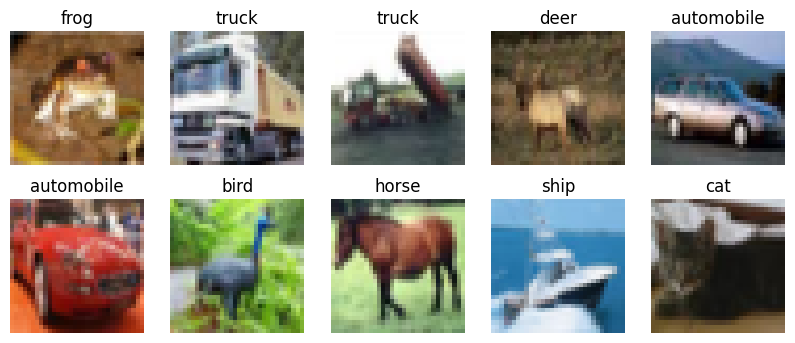

In [2]:
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Função para exibir imagens do conjunto de dados
def show_images(images, labels, n_rows=2, n_cols=5):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_title(class_names[labels[i][0]])
        ax.axis('off')
    plt.show()

show_images(x_train, y_train)

No Keras usamos o pacote ``ImageDataGenerator``.

A partir dele vamos aplicar várias transformações nas imagens do conjunto de dados durante o treinamento do modelo.

`rotation_range` = 15
  
  - Isso permitirá que as imagens sejam rotacionadas aleatoriamente em um intervalo de até ±15 graus.

`width_shift_range` = 0.1
  
  - Este parâmetro permite que as imagens sejam deslocadas horizontalmente. O valor 0.1 significa que a imagem pode ser deslocada aleatoriamente até 10% de sua largura.

`height_shift_range` = 0.1

  - Similar ao parâmetro anterior, mas para deslocamento vertical. As imagens podem ser deslocadas aleatoriamente até 10% de sua altura.

`shear_range` = 0.1

  - Este parâmetro permite que uma distorção de cisalhamento seja aplicada às imagens. Um cisalhamento é uma transformação que desliza uma parte da imagem em uma direção, enquanto a outra parte é deslizada na direção oposta. O valor 0.1 indica a intensidade do cisalhamento.

`zoom_range` = 0.1

  - Isso permite que as imagens sejam ampliadas ou reduzidas aleatoriamente. O valor 0.1 indica que o zoom pode variar de 0,9 (zoom out) a 1,1 (zoom in).

`horizontal_flip` = True

  - Isso permite que as imagens sejam espelhadas horizontalmente (ou seja, invertidas de esquerda para direita) com uma probabilidade de 50%.

`fill_mode` = 'nearest'

  - Durante transformações como rotação ou deslocamento, podem aparecer alguns pixels vazios na imagem. O fill_mode determina como preencher esses pixels. O valor 'nearest' significa que ele usará o valor do pixel mais próximo para preencher os pixels vazios.

`rescale` = 1./255

  - Este é um passo importante de pré-processamento. As imagens geralmente têm valores de pixel no intervalo [0, 255]. Este parâmetro irá reescalar esses valores para o intervalo [0, 1], dividindo cada pixel por 255. Isso é comumente feito para facilitar a convergência durante o treinamento de redes neurais.

Existem outros parametros e não é obrigatório o uso de todos são necessários, vai depender do problema que está sendo atacado.

In [3]:
from keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255)


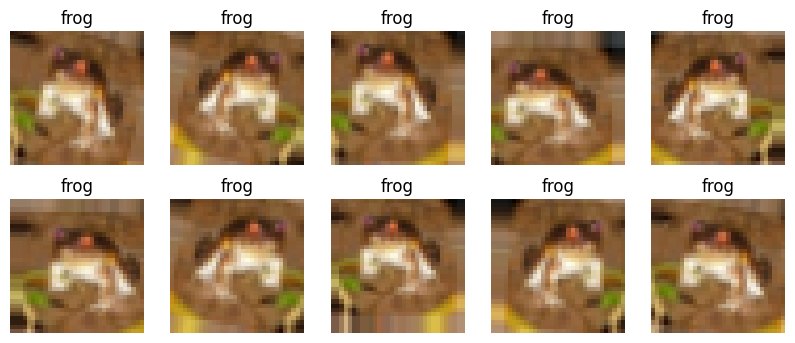

In [4]:
import numpy as np

def show_augmented_images(data_gen, image, label, n_rows=2, n_cols=5):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4))
    img_iterator = data_gen.flow(np.array([image]), np.array([label]))

    for i, ax in enumerate(axes.flat):
        img, lbl = next(img_iterator)
        ax.imshow(img[0])
        ax.set_title(class_names[lbl[0].item()])
        ax.axis('off')
    plt.show()


# Selecionar uma imagem do conjunto de dados
image_index = 0
image = x_train[image_index]
label = y_train[image_index]

# Exibir imagens aumentadas
show_augmented_images(data_gen, image, label)


Note nas variações criadas a partir de uma única imagem.

In [6]:
## Vamos treinar com um modelo de arquitetura simples e generico apenas para testes

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [7]:
# Definir o número de imagens aumentadas por imagem original
augmentation_factor = 5

# Criar listas vazias para armazenar as imagens e rótulos aumentados
x_train_augmented = []
y_train_augmented = []

# Aplicar a augmentação de dados
for img, lbl in zip(x_train, y_train):
    x_train_augmented.append(img)  # Adicionar a imagem original
    y_train_augmented.append(lbl)  # Adicionar o rótulo original

    for _ in range(augmentation_factor - 1):
        # Gerar uma imagem aumentada
        augmented_img = data_gen.random_transform(img)

        # Adicionar a imagem e o rótulo aumentado às listas
        x_train_augmented.append(augmented_img)
        y_train_augmented.append(lbl)

# Converter as listas em arrays numpy
x_train_augmented = np.array(x_train_augmented)
y_train_augmented = np.array(y_train_augmented)

# Normalizar as imagens
x_train_augmented = x_train_augmented / 255.0


In [8]:
batch_size = 64
steps_per_epoch = len(x_train) // batch_size

history = model.fit_generator(data_gen.flow(x_train, y_train, batch_size=batch_size),
                              steps_per_epoch=steps_per_epoch,
                              epochs=20,
                              validation_data=(x_test / 255, y_test))


<ipython-input-8-5c79c9165d79>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_gen.flow(x_train, y_train, batch_size=batch_size),


Epoch 1/20
781/781 [==============================] - 49s 47ms/step - loss: 1.6233 - accuracy: 0.1013 - val_loss: 1.3768 - val_accuracy: 0.0747
Epoch 2/20
781/781 [==============================] - 35s 45ms/step - loss: 1.3372 - accuracy: 0.0961 - val_loss: 1.0923 - val_accuracy: 0.0754
Epoch 3/20
781/781 [==============================] - 34s 44ms/step - loss: 1.2253 - accuracy: 0.0985 - val_loss: 1.0212 - val_accuracy: 0.0913
Epoch 4/20
781/781 [==============================] - 35s 45ms/step - loss: 1.1576 - accuracy: 0.0981 - val_loss: 0.9678 - val_accuracy: 0.0979
Epoch 5/20
781/781 [==============================] - 35s 44ms/step - loss: 1.1060 - accuracy: 0.0991 - val_loss: 0.9049 - val_accuracy: 0.0882
Epoch 6/20
781/781 [==============================] - 34s 43ms/step - loss: 1.0655 - accuracy: 0.0992 - val_loss: 0.9184 - val_accuracy: 0.1010
Epoch 7/20
781/781 [==============================] - 34s 44ms/step - loss: 1.0375 - accuracy: 0.0993 - val_loss: 0.8804 - val_accuracy: